In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Import previous season data
df = pd.read_csv("./data/nfl-stats.csv", index_col=None, header=0)
# Import current season data
t = pd.read_csv("./data/2021-current.csv", index_col=None, header=0)

df.head(15)

This is a multi-level dataset (i.e. year, teams, players)

Text(0, 0.5, 'yards')

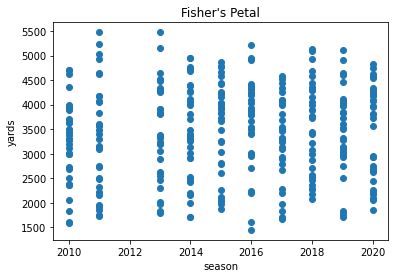

In [4]:
fig, ax = plt.subplots()

ax.scatter(df['year'], df['yards'])
ax.set_title('Fisher\'s Petal')
ax.set_xlabel('season')
ax.set_ylabel('yards')

In [60]:
# Model can only handle positive values
df.fillna(0)
df['rush yards'] = df['rush yards'].apply(lambda x : x if x > 0 else 0)
df.round(2)

,year,player,mvp,team,wins,yards,td,cmp%,int,qbr,rush yards,rush td
0,2020,Deshaun Watson,0,HOU,4,4823.0,33.0,70.2,7.0,70.5,444,3
1,2020,Patrick Mahomes,0,KAN,14,4740.0,38.0,66.3,6.0,82.9,308,2
2,2020,Tom Brady,0,TAM,11,4633.0,40.0,65.7,12.0,72.5,6,3
3,2020,Matt Ryan,0,ATL,4,4581.0,26.0,65.0,11.0,67.0,92,2
4,2020,Josh Allen,0,BUF,13,4544.0,37.0,69.2,10.0,81.7,421,8
...,...,...,...,...,...,...,...,...,...,...,...,...
315,2011,Kevin Kolb,0,ARI,3,1955.0,9.0,57.7,8.0,33.3,65,0
316,2011,John Skelton,0,ARI,5,1913.0,11.0,54.9,14.0,37.3,128,0
317,2011,Christian Ponder,0,MIN,2,1853.0,13.0,54.3,13.0,32.4,219,0
318,2011,Kyle Orton,0,2TM,3,1758.0,9.0,59.5,9.0,NaN,13,0


In [61]:
# Each season is broken up by 32 rows (for the QBs on all 32 teams).
# Training: (0-31), (64-95), (128-159), (192-223), (256-287)
# Test: (32-63), (96-127), (160-191), (224-255), (288-320)

x_train, x_test, y_train, y_test = train_test_split(df.loc[:, 'wins':'rush td'], df['mvp'], test_size=0.5, stratify=df['mvp'])